## import libraries


In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import os 
import time
import pickle
from numpy.lib.function_base import average

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## methods to get file results

In [5]:
def get_files(path_folder):
  """
  read all files in passed path
  input:
  path_folder: the path of folder contains files

  output:
  all_file_paths: list contains names of folders in passed folder

  """
  folders = os.listdir(path_folder)
  all_file_paths_1 = []
  all_file_paths_2 = []
  for folder in folders:
    curr_dataset_path = os.path.join(path_folder, folder)
    if os.path.isfile(curr_dataset_path):
      all_file_paths_1.append(curr_dataset_path)
    else:
      # print(curr_dataset_path)
      all_file_paths_2.extend(get_files(curr_dataset_path))

    all_file_paths = all_file_paths_1 + all_file_paths_2
  return all_file_paths

In [6]:
def get_y_t_for_fileCsv(path_file):
  labeling_data = pd.read_csv(path_file)
  y_t_list = labeling_data['eye_contact'].tolist()
  return y_t_list
    

In [7]:
"""why get_y_p different from get_y_t : 
   because in store y_p we taked frame by frame but in y_t we taked 15 frames by 15 frames 
"""
def get_y_p_for_fileCsv(path_file):
  supervised = pd.read_csv(path_file)
  # print(supervised[supervised.columns[0]][len(supervised)-1])
  supervised = supervised.drop(labels=[len(supervised)-1])
  # print(supervised[supervised.columns[0]][len(supervised)-1])
  # print(len(supervised))
  y_p_list = []
  j = 0
  index ,step = 0,0
  scope = int(np.ceil(len(supervised)/15)+1)
  for i in range(1,scope):
    # print(i*15-step+1)
    if (i*15)>(len(supervised)-1):
      index = supervised[supervised.columns[0]][len(supervised)-1]
      chunk = supervised.iloc[j: len(supervised)-1]
    else:
      # print(i*15)
      index = supervised[supervised.columns[0]][i*15]
      step = int(index) % 15
      chunk = supervised.iloc[j: i*15-step+1]
    y_p = 1 if average(chunk[chunk.columns[1]].astype('float'))>0.5 else 0
    y_p_list.append(y_p)
    j = i*15-step+1
  return y_p_list
    

## visualize results

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns 
sns.set(rc={'figure.figsize':(18,12)})

def print_result(y_pred, y_test , title):

    if len(y_test) < len(y_pred):
      y_pred = y_pred[: len(y_test)]
    elif len(y_test) > len(y_pred):
      y_test = y_test[: len(y_pred)]

    accuracy = accuracy_score(y_pred, y_test)
    classification_rep = classification_report(y_test, y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)
    print(con_matrix)

    # ploting confustion matrix
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    # categories = [‘Zero’, ‘One’]
    # make_confusion_matrix(cf_matrix, 
    #                   group_names=labels,
    #                   categories=categories, 
    #                   cmap=’binary’)

    # sns.heatmap(con_matrix, annot=True, annot_kws={"size": 16},fmt='g', cmap='Blues')
    
    # for i in range(2):
    #   a=con_matrix.tolist()
    print('y_true class: 0   ',y_test.count(0))
    print('y_true class: 1   ',y_test.count(1))
    group_names =['without EC']
    
#     labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(np.round(con_matrix / np.array([[y_test.count(0) , y_test.count(0)],[y_test.count(1) , y_test.count(1)]]), 3),
                xticklabels= ['without EC' , 'with EC'], yticklabels=['without EC' , 'with EC']  , annot=True, annot_kws={"size": 16},fmt='g', cmap='Blues')
    
    plt.title(title ,  fontsize = 18)
    plt.text(x =0,y = 2.5 , s = "accuracy  score on test : {}".format(accuracy))
    plt.text(x=0 , y = 3.5, s =  classification_rep )
    
    plt.xlabel("Predicted value")
    plt.ylabel("Real value")
    plt.savefig("{} .png".format(title))

    # plt.savefig('foo.pdf')
    plt.show()

    # print scores
    # print ("accuracy  score on test : {}".format(accuracy))
    # print(classification_rep)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score 
def Convert_To_DataFarme(name_data, method_name ,y_true,y_pred):
    print("y_true" , y_true)
    print("y_pred" , y_pred)
    if len(y_true) < len(y_pred):
      y_pred = y_pred[: len(y_true)]
    elif len(y_true) > len(y_pred):
      y_true = y_true[: len(y_pred)]

    accuracies, precisions, recalls, f1_scores ,auc_scores = [], [], [], [] ,[]
    
    accuracies.append(accuracy_score(y_true, y_pred))
    precisions.append(precision_score(y_true, y_pred))
    recalls.append(recall_score(y_true, y_pred))
    f1_scores.append(f1_score(y_true, y_pred))
      
    df = pd.DataFrame({'filename':name_data,'accuracy': accuracies,
                       'precision': precisions, 'recall': recalls, 'f1_score': f1_scores,
                       'method_name': method_name
                      })

    return df

In [ ]:
No12_C_yt = get_y_t_for_fileCsv('/content/drive/MyDrive/The results of eye contact/labeling data/Presenter No11-Rafeef/C_Presenter No11-GroupC.csv')
No12_C_yp = get_y_p_for_fileCsv('/content/drive/MyDrive/The results of eye contact/supervised/Presenter No11-Rafeef/C_Presenter No11-GroupC_output.csv')
print(No12_C_yt)
print(No12_C_yp)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print_result(y_pred= No12_C_yp , y_test= No12_C_yt)

In [43]:
list_data = ['Presenter No11-Rafeef' , 'Presenter No14-Ikhwan' , 'Presenter No13-Nurin','Presenter No17-Arif']
files_labeling_tool = []
files_product_sup = []
files_product_unsup = []
for name in list_data:
  files_labeling_tool.extend(get_files('/content/drive/MyDrive/The results of eye contact/labeling data/'+name))
  files_product_sup.extend(get_files('/content/drive/MyDrive/The results of eye contact/supervised/'+name))
  files_product_unsup.extend(get_files('/content/drive/MyDrive/The results of eye contact/unsupervised/'+name))


In [44]:
for i in range(len(files_labeling_tool)):
  print(files_labeling_tool[i].split('/')[-1])
  print(files_product_sup[i].split('/')[-1])
  print(files_product_unsup[i].split('/')[-1])


C_Presenter No11-GroupA.csv
C_Presenter No11-GroupA_output.csv
C_Presenter No11-GroupA_output.csv
C_Presenter No11-GroupB.csv
C_Presenter No11-GroupB_output.csv
C_Presenter No11-GroupB_output.csv
C_Presenter No11-GroupC.csv
C_Presenter No11-GroupC_output.csv
C_Presenter No11-GroupC_output.csv
C_Presenter No11-GroupD.csv
C_Presenter No11-GroupD_output.csv
C_Presenter No11-GroupD_output.csv
C_Presenter No15-GroupA.csv
C_Presenter No15-GroupA_output.csv
C_Presenter No15-GroupA_output.csv
C_Presenter No15-GroupB.csv
C_Presenter No15-GroupB_output.csv
C_Presenter No15-GroupB_output.csv
C_Presenter No15-GroupC.csv
C_Presenter No15-GroupC_output.csv
C_Presenter No15-GroupC_output.csv
C_Presenter No15-GroupD.csv
C_Presenter No15-GroupD_output.csv
C_Presenter No15-GroupD_output.csv
C_Presenter No13-GroupA.csv
C_Presenter No13-GroupA_output.csv
C_Presenter No13-GroupA_output.csv
C_Presenter No13-GroupB.csv
C_Presenter No13-GroupB_output.csv
C_Presenter No13-GroupB_output.csv
C_Presenter No13-Gro

================================== C_Presenter No11-GroupA.csv =================================
C_Presenter No11-GroupA.csv
[[  1   5]
 [  0 190]]
y_true class: 0    6
y_true class: 1    190


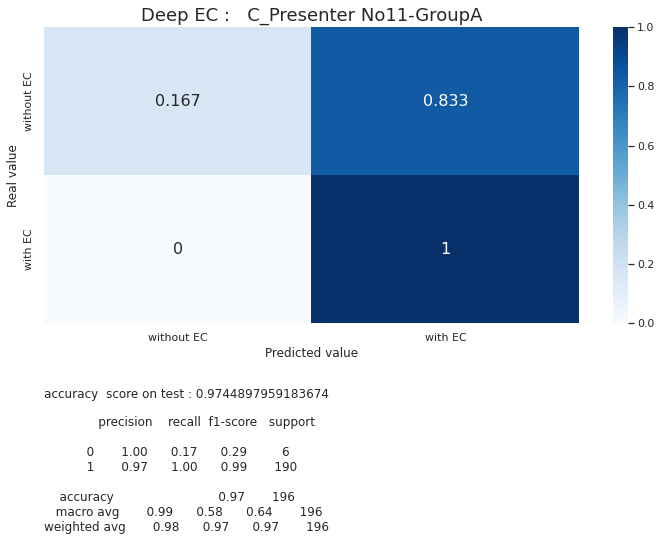

================================== C_Presenter No11-GroupB.csv =================================
C_Presenter No11-GroupB.csv
[[  0   2]
 [  4 189]]
y_true class: 0    2
y_true class: 1    193


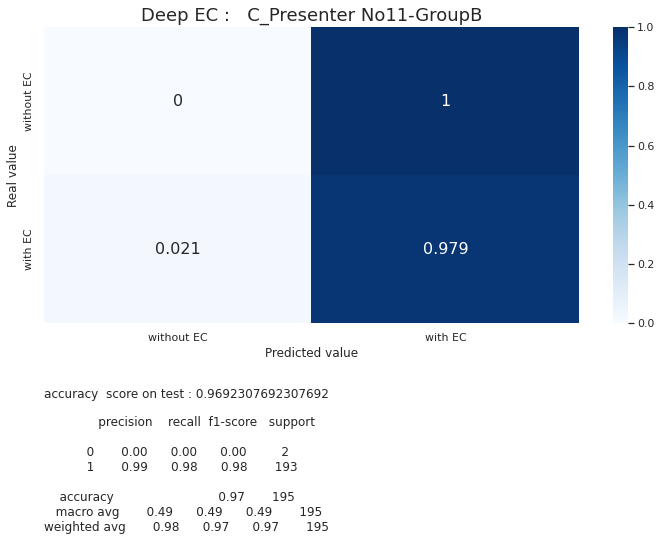

================================== C_Presenter No11-GroupC.csv =================================
C_Presenter No11-GroupC.csv
[[194   6]
 [  0   0]]
y_true class: 0    200
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

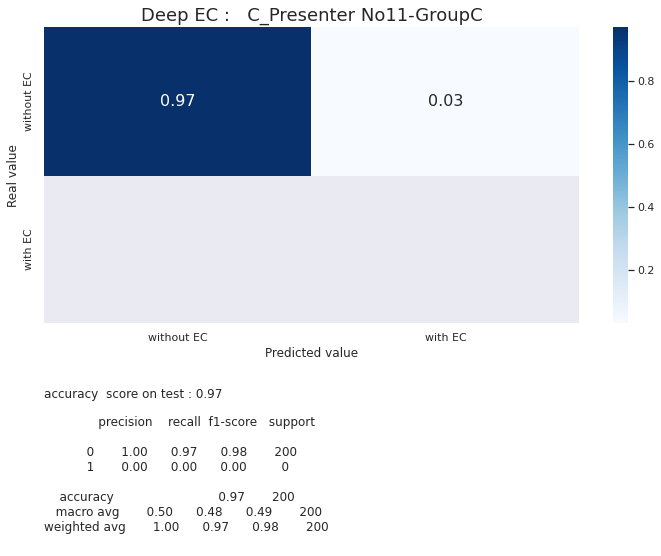

================================== C_Presenter No11-GroupD.csv =================================
C_Presenter No11-GroupD.csv
[[198   3]
 [  0   0]]
y_true class: 0    201
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

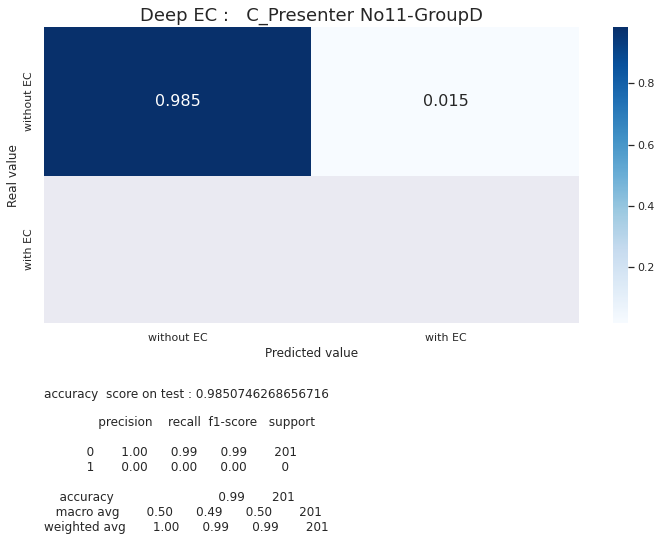

================================== C_Presenter No15-GroupA.csv =================================
C_Presenter No15-GroupA.csv


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   3]
 [  0 199]]
y_true class: 0    3
y_true class: 1    199


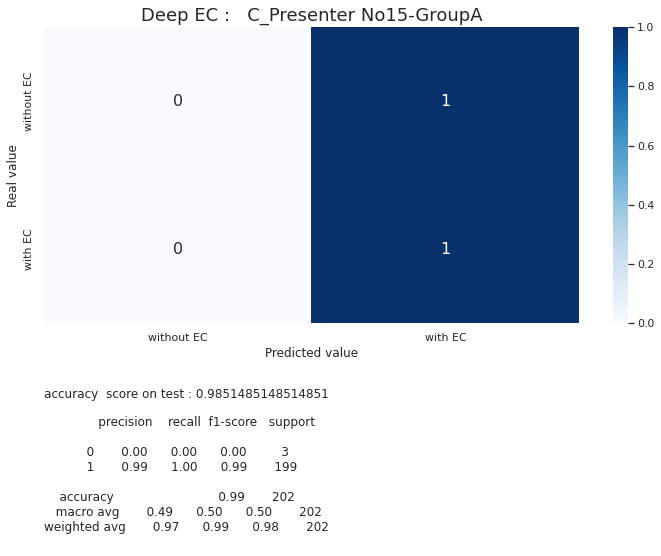

================================== C_Presenter No15-GroupB.csv =================================
C_Presenter No15-GroupB.csv
[[  0   4]
 [  1 196]]
y_true class: 0    4
y_true class: 1    197


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


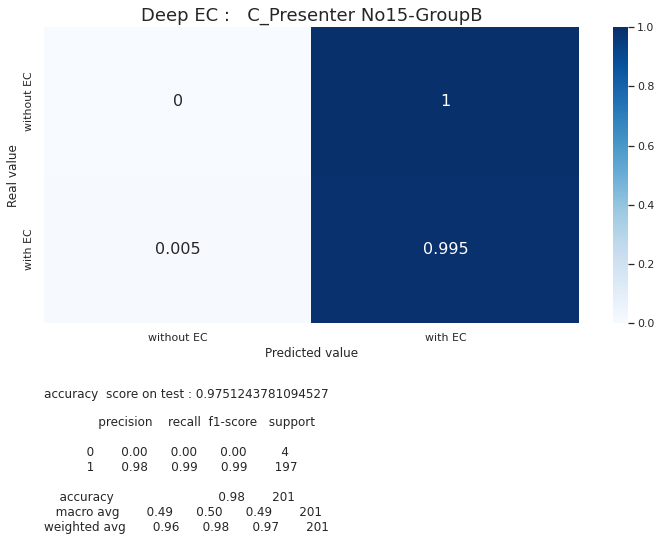

================================== C_Presenter No15-GroupC.csv =================================
C_Presenter No15-GroupC.csv
[[202   5]
 [  2   3]]
y_true class: 0    207
y_true class: 1    5


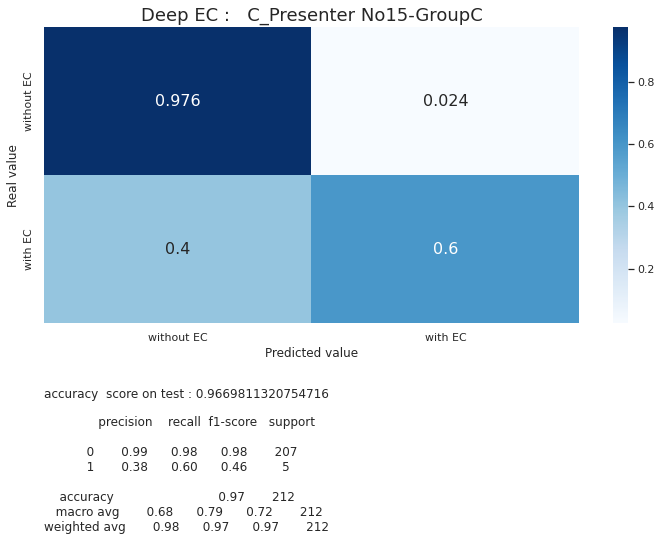

================================== C_Presenter No15-GroupD.csv =================================
C_Presenter No15-GroupD.csv
[[202   2]
 [  0   0]]
y_true class: 0    204
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

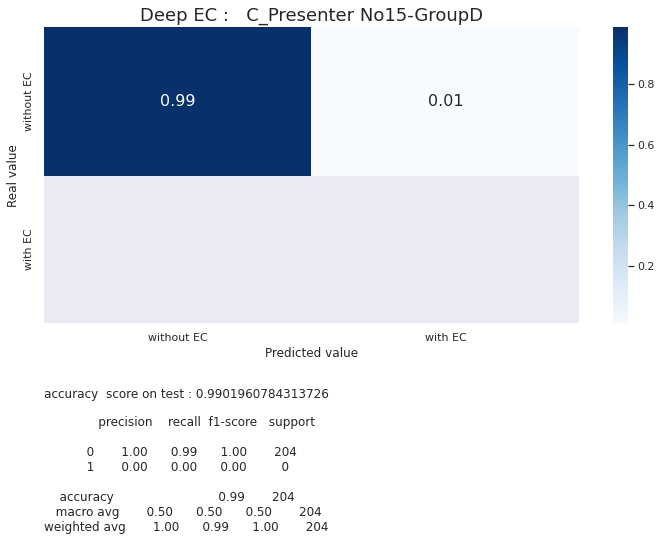

================================== C_Presenter No13-GroupA.csv =================================
C_Presenter No13-GroupA.csv
[[  1  15]
 [  3 211]]
y_true class: 0    16
y_true class: 1    214


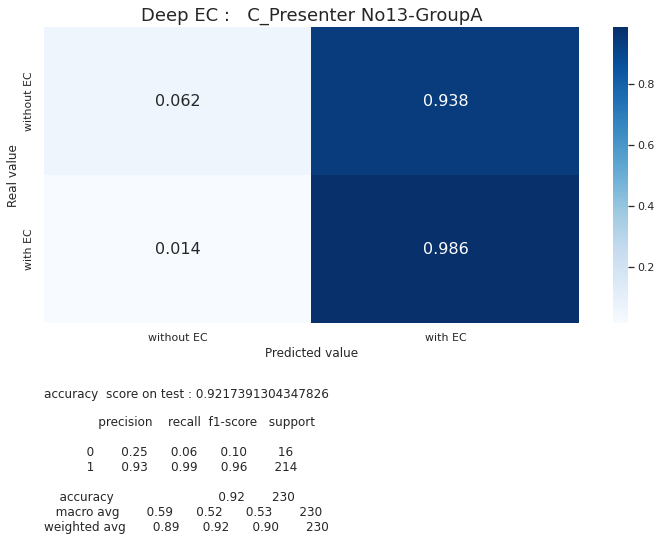

================================== C_Presenter No13-GroupB.csv =================================
C_Presenter No13-GroupB.csv
[[  0  18]
 [  1 168]]
y_true class: 0    18
y_true class: 1    169


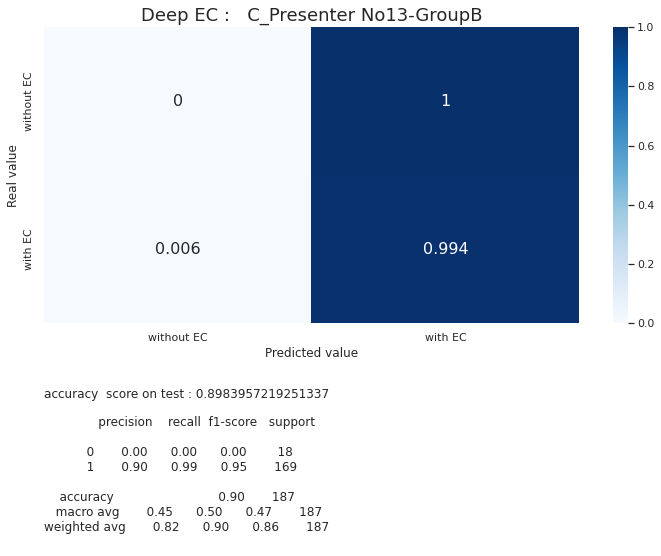

================================== C_Presenter No13-GroupC.csv =================================
C_Presenter No13-GroupC.csv
[[187   3]
 [  1   1]]
y_true class: 0    190
y_true class: 1    2


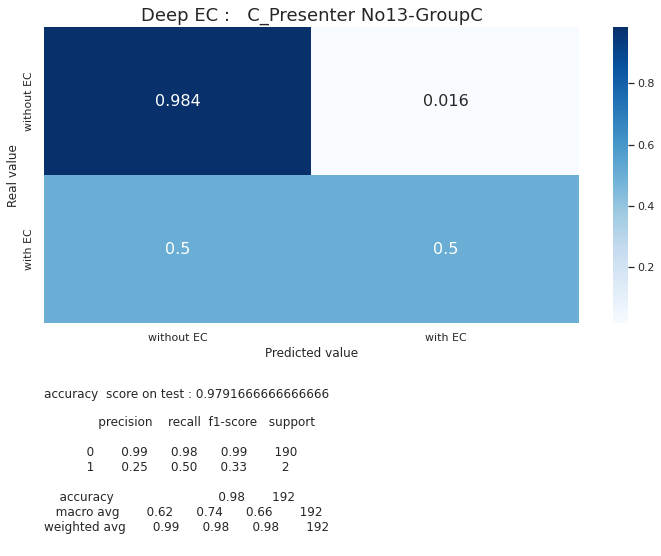

================================== C_Presenter No13-GroupD.csv =================================
C_Presenter No13-GroupD.csv
[[189   2]
 [  1   0]]
y_true class: 0    191
y_true class: 1    1


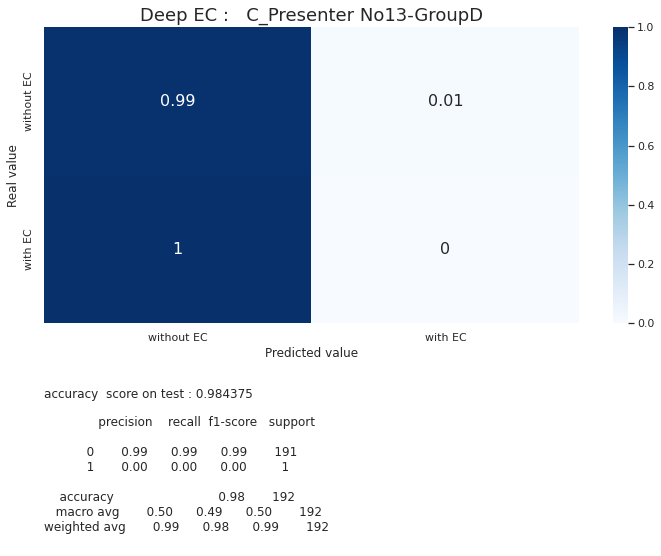

================================== C_Presenter No17-GroupA.csv =================================
C_Presenter No17-GroupA.csv
[[  0   2]
 [  0 202]]
y_true class: 0    2
y_true class: 1    202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


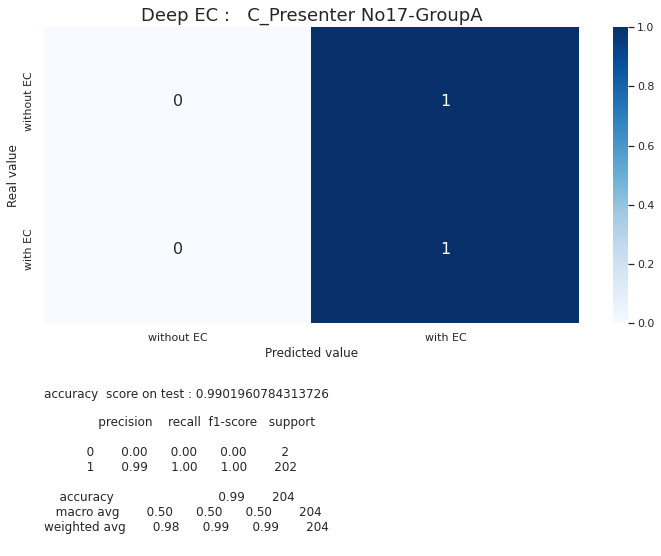

================================== C_Presenter No17-GroupB.csv =================================
C_Presenter No17-GroupB.csv
[[  2  11]
 [  6 182]]
y_true class: 0    13
y_true class: 1    188


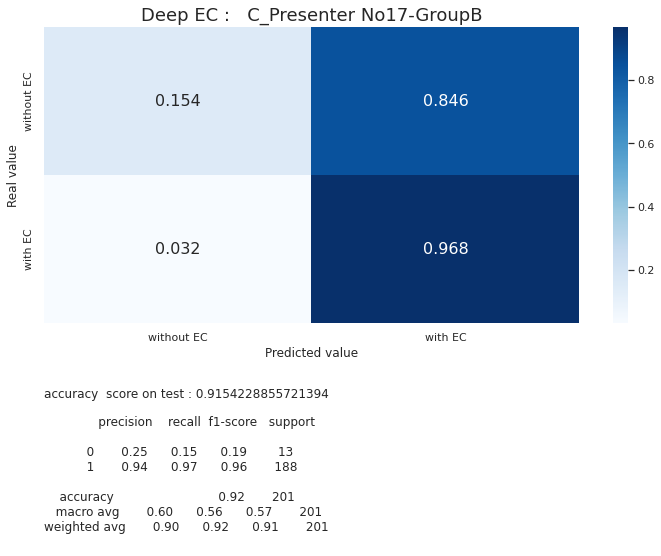

================================== C_Presenter No17-GroupC.csv =================================
C_Presenter No17-GroupC.csv
[[183   5]
 [  3   6]]
y_true class: 0    188
y_true class: 1    9


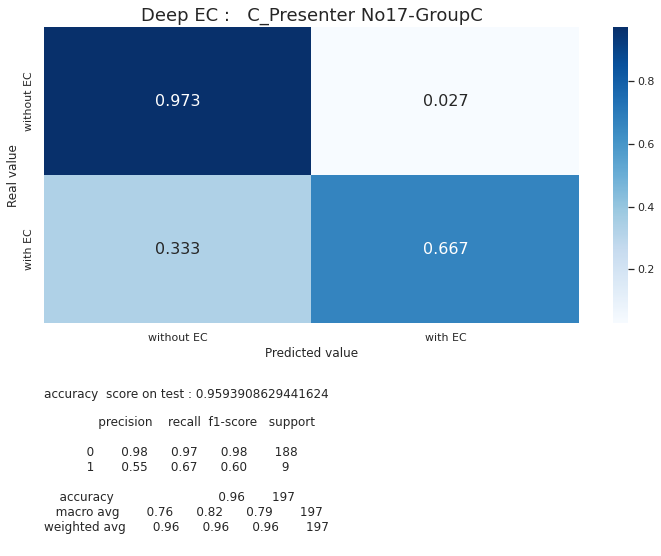

================================== C_Presenter No17-GroupD.csv =================================
C_Presenter No17-GroupD.csv
[[198   2]
 [  0   0]]
y_true class: 0    200
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

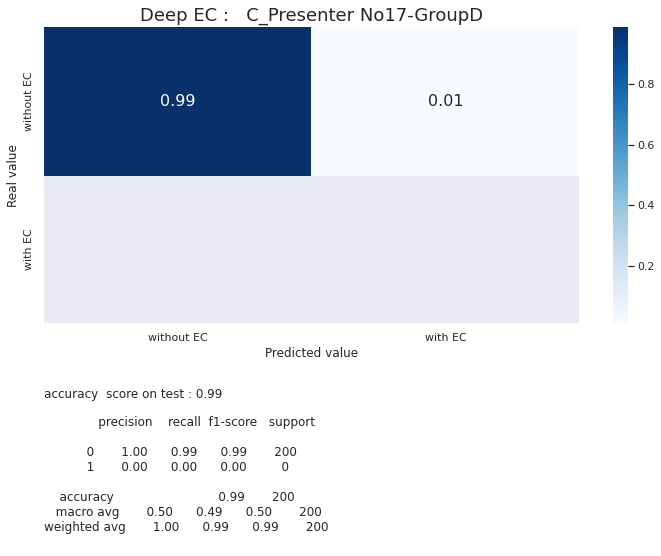

In [40]:
for i in range(len(files_labeling_tool)):
  print('===================================================================')
  print('==================================',files_labeling_tool[i].split('/')[-1],'=================================')
  print(files_labeling_tool[i].split('/')[-1])
  No12_C_yt = get_y_t_for_fileCsv(files_labeling_tool[i])
  No12_C_yp = get_y_p_for_fileCsv(files_product_sup[i])
  print_result(y_pred= No12_C_yp , y_test= No12_C_yt , title = "Deep EC :   "+files_labeling_tool[i].split('/')[-1].split('.')[0])

================================== C_Presenter No11-GroupA.csv =================================
C_Presenter No11-GroupA.csv
[[  0   6]
 [  1 189]]
y_true class: 0    6
y_true class: 1    190


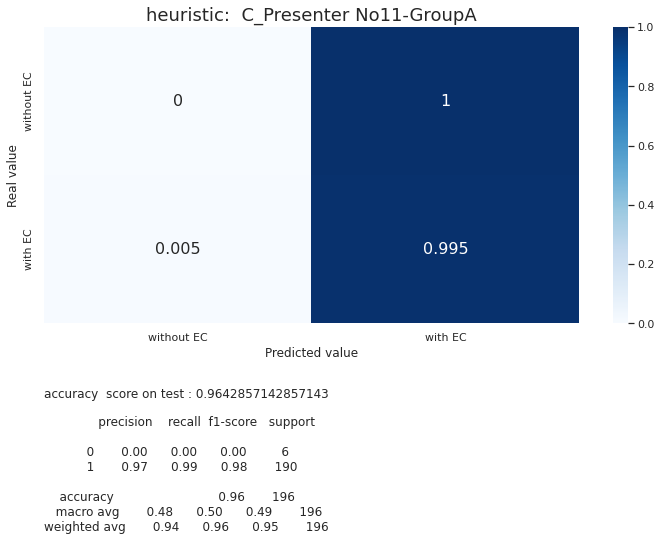

================================== C_Presenter No11-GroupB.csv =================================
C_Presenter No11-GroupB.csv
[[  0   2]
 [  3 191]]
y_true class: 0    2
y_true class: 1    194


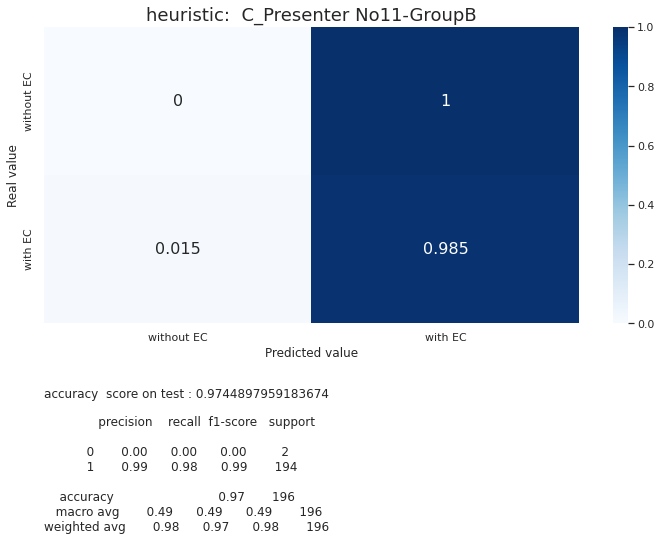

================================== C_Presenter No11-GroupC.csv =================================
C_Presenter No11-GroupC.csv
[[129  71]
 [  0   0]]
y_true class: 0    200
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

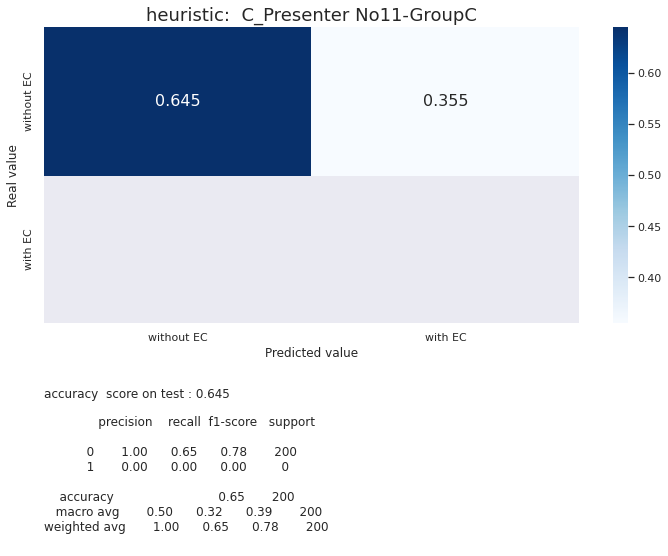

================================== C_Presenter No11-GroupD.csv =================================
C_Presenter No11-GroupD.csv
[[158  34]
 [  0   0]]
y_true class: 0    192
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

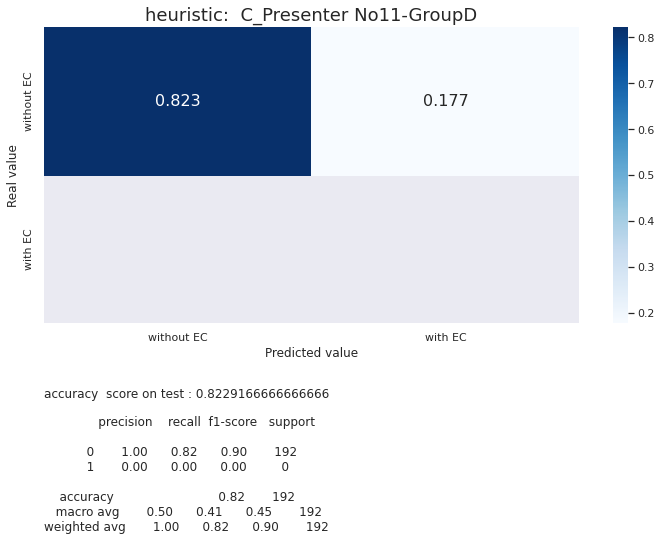

================================== C_Presenter No15-GroupA.csv =================================
C_Presenter No15-GroupA.csv
[[  0   3]
 [  5 194]]
y_true class: 0    3
y_true class: 1    199


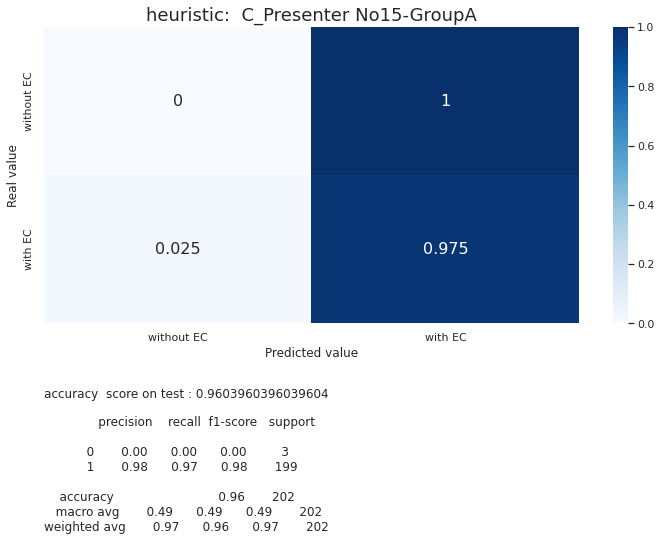

================================== C_Presenter No15-GroupB.csv =================================
C_Presenter No15-GroupB.csv
[[  1   3]
 [  5 191]]
y_true class: 0    4
y_true class: 1    196


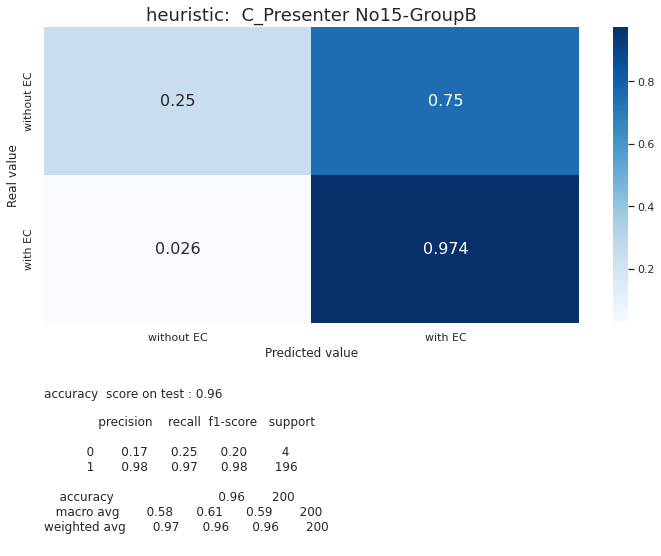

================================== C_Presenter No15-GroupC.csv =================================
C_Presenter No15-GroupC.csv
[[168  36]
 [  3   2]]
y_true class: 0    204
y_true class: 1    5


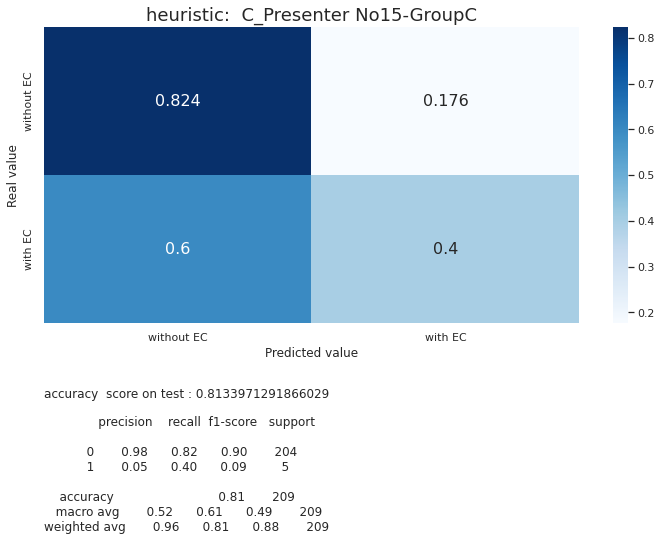

================================== C_Presenter No15-GroupD.csv =================================
C_Presenter No15-GroupD.csv
[[132  71]
 [  0   0]]
y_true class: 0    203
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

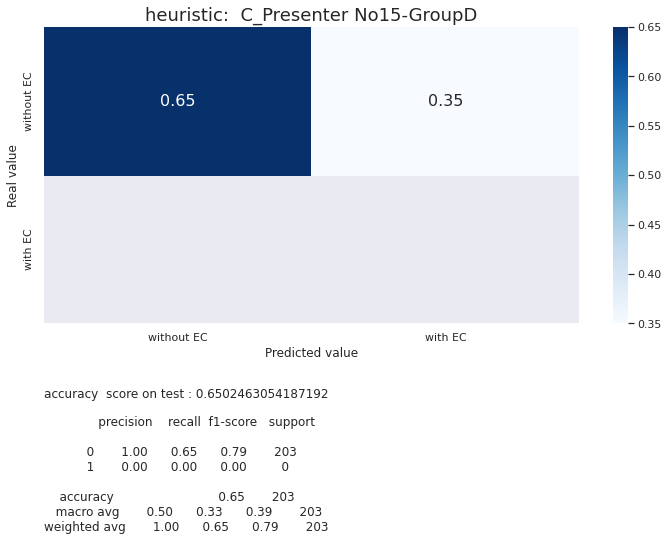

================================== C_Presenter No13-GroupA.csv =================================
C_Presenter No13-GroupA.csv
[[  3  13]
 [ 49 163]]
y_true class: 0    16
y_true class: 1    212


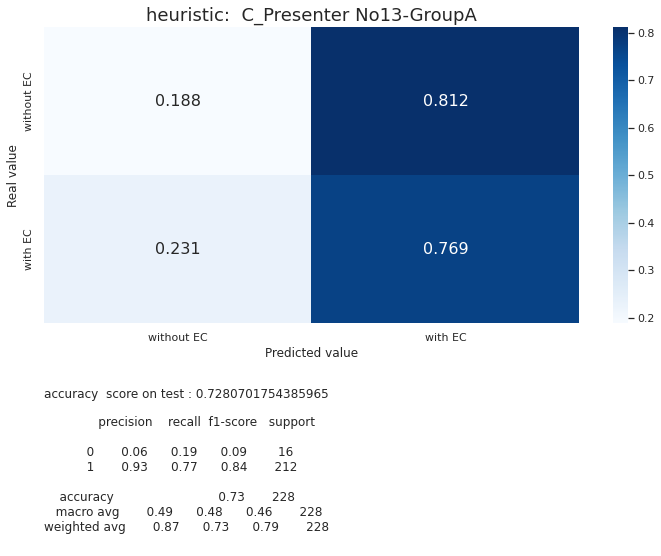

================================== C_Presenter No13-GroupB.csv =================================
C_Presenter No13-GroupB.csv
[[  0  17]
 [  8 148]]
y_true class: 0    17
y_true class: 1    156


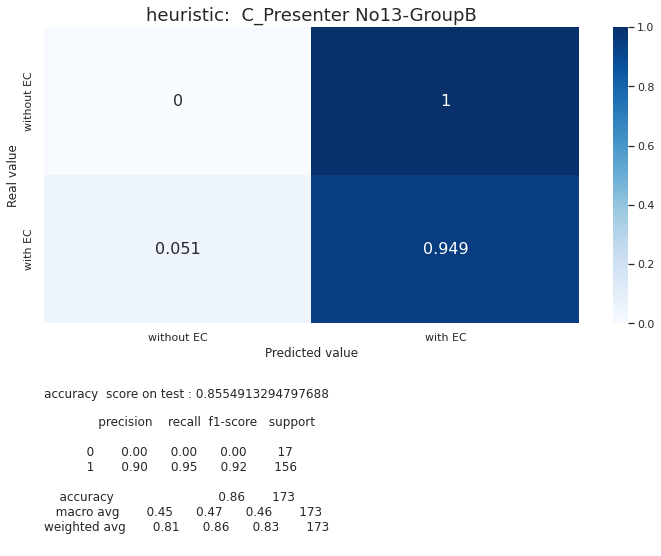

================================== C_Presenter No13-GroupC.csv =================================
C_Presenter No13-GroupC.csv
[[132  31]
 [  2   0]]
y_true class: 0    163
y_true class: 1    2


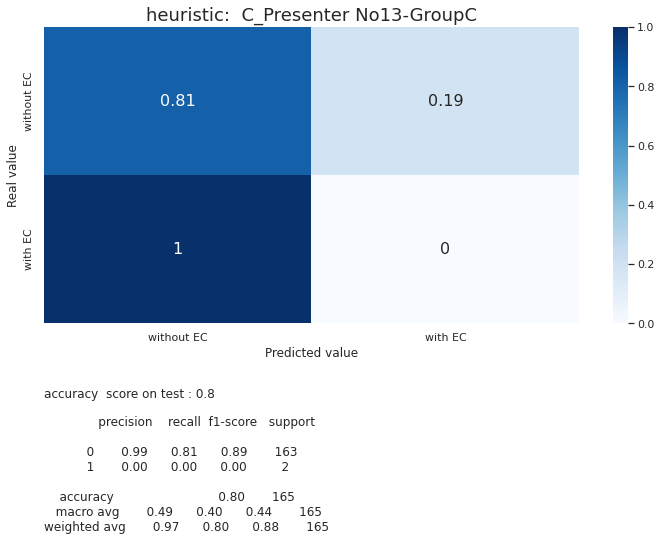

================================== C_Presenter No13-GroupD.csv =================================
C_Presenter No13-GroupD.csv
[[54  3]
 [ 0  0]]
y_true class: 0    57
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

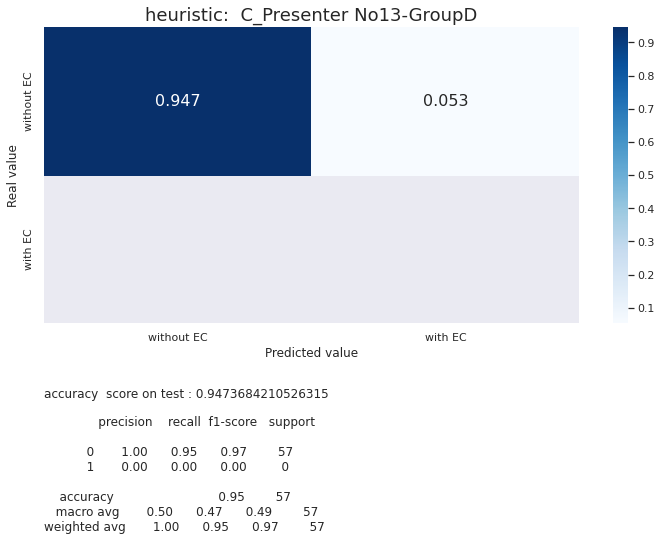

================================== C_Presenter No17-GroupA.csv =================================
C_Presenter No17-GroupA.csv
[[  0   2]
 [  1 201]]
y_true class: 0    2
y_true class: 1    202


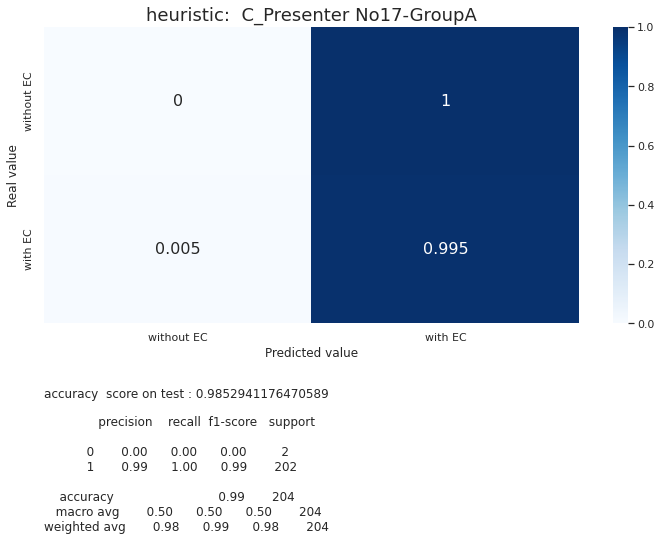

================================== C_Presenter No17-GroupB.csv =================================
C_Presenter No17-GroupB.csv
[[  3  10]
 [  4 184]]
y_true class: 0    13
y_true class: 1    188


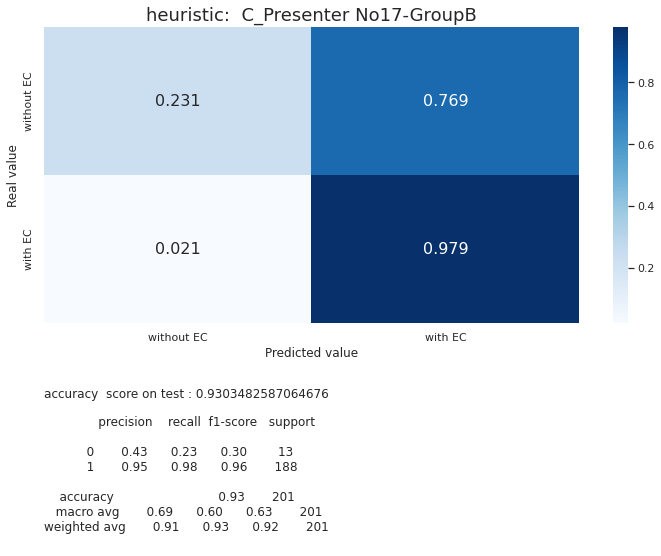

================================== C_Presenter No17-GroupC.csv =================================
C_Presenter No17-GroupC.csv
[[84 95]
 [ 0  9]]
y_true class: 0    179
y_true class: 1    9


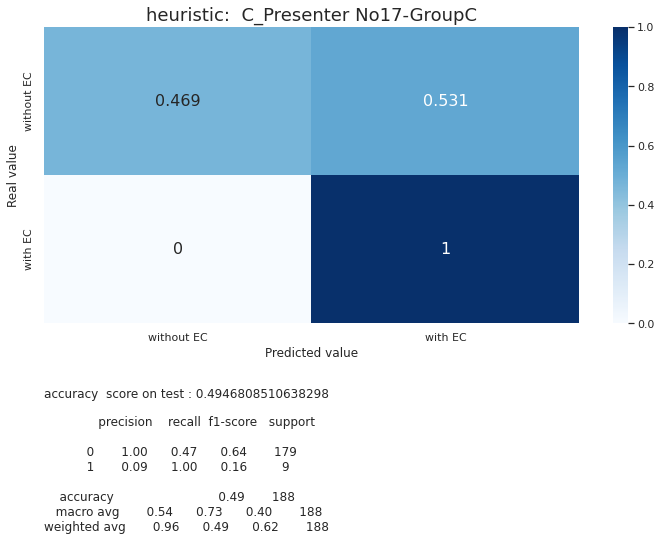

================================== C_Presenter No17-GroupD.csv =================================
C_Presenter No17-GroupD.csv
[[ 98 102]
 [  0   0]]
y_true class: 0    200
y_true class: 1    0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid va

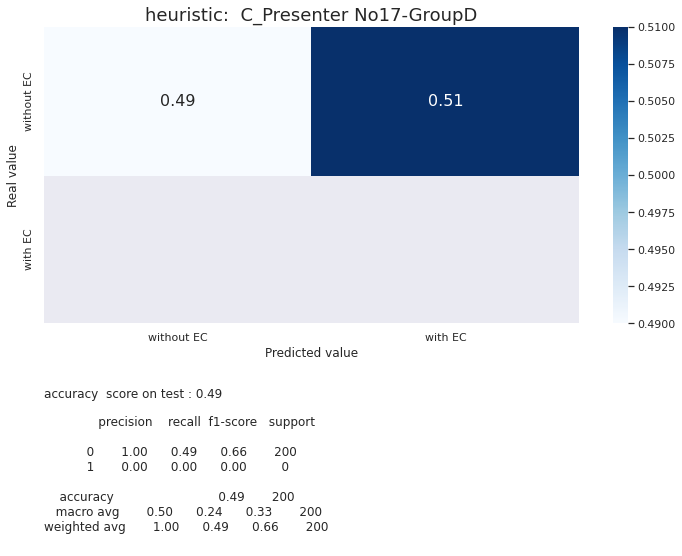

In [41]:
for i in range(len(files_labeling_tool)):
  print('===================================================================')
  print('==================================',files_labeling_tool[i].split('/')[-1],'=================================')
  print(files_labeling_tool[i].split('/')[-1])
  No12_C_yt = get_y_t_for_fileCsv(files_labeling_tool[i])
  No12_C_yp = get_y_p_for_fileCsv(files_product_unsup[i])
  print_result(y_pred= No12_C_yp , y_test= No12_C_yt , title = "heuristic:  "+files_labeling_tool[i].split('/')[-1].split('.')[0])

In [47]:
df = None
list_df = []
for i in range(len(files_labeling_tool)):
  list_y_t = (get_y_t_for_fileCsv(files_labeling_tool[i]))
  list_y_p_sup = (get_y_p_for_fileCsv(files_product_sup[i]))
  list_y_p_unsup = (get_y_p_for_fileCsv(files_product_unsup[i]))
  name_data = files_labeling_tool[i].split('/')[-1].split(' ')[-1].split('.')[0]
  df1 = Convert_To_DataFarme(name_data , 'DeepEC', y_true= list_y_t ,y_pred= list_y_p_sup)
  df2 = Convert_To_DataFarme(name_data ,"Heuristic", y_true= list_y_t ,y_pred= list_y_p_unsup)
  list_df.append(df1)
  list_df.append(df2)

df1 = pd.concat(list_df,axis = 0)
df = pd.concat([df,df1],axis = 0)

df
# df1

y_true [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

y_true [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
y_pred [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


y_true [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_true [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_true [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,filename,accuracy,precision,recall,f1_score,method_name
0,No11-GroupA,0.974490,0.974359,1.000000,0.987013,DeepEC
0,No11-GroupA,0.964286,0.969231,0.994737,0.981818,Heuristic
0,No11-GroupB,0.969231,0.989529,0.979275,0.984375,DeepEC
0,No11-GroupB,0.974490,0.989637,0.984536,0.987080,Heuristic
0,No11-GroupC,0.970000,0.000000,0.000000,0.000000,DeepEC
0,No11-GroupC,0.645000,0.000000,0.000000,0.000000,Heuristic
0,No11-GroupD,0.985075,0.000000,0.000000,0.000000,DeepEC
0,No11-GroupD,0.822917,0.000000,0.000000,0.000000,Heuristic
0,No15-GroupA,0.985149,0.985149,1.000000,0.992519,DeepEC
0,No15-GroupA,0.960396,0.984772,0.974874,0.979798,Heuristic


In [ ]:
df

In [48]:
sns.set(rc = {'figure.figsize':(22,12)}, style="whitegrid")

def barplot(data, title,x, y, hue='method_name'):
    ax = sns.catplot(x=x, y=y, hue=hue, data=data, kind='bar',
           height=3, aspect=4)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=60)
    plt.tick_params(axis='both', which='major', labelsize=6)

    plt.savefig('{}'.format(title))
    
    plt.show()

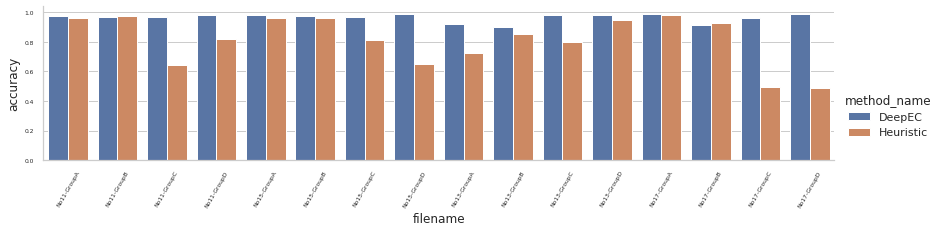

In [49]:
barplot(df, title='accuracy.svg', x='filename', y='accuracy', hue='method_name')


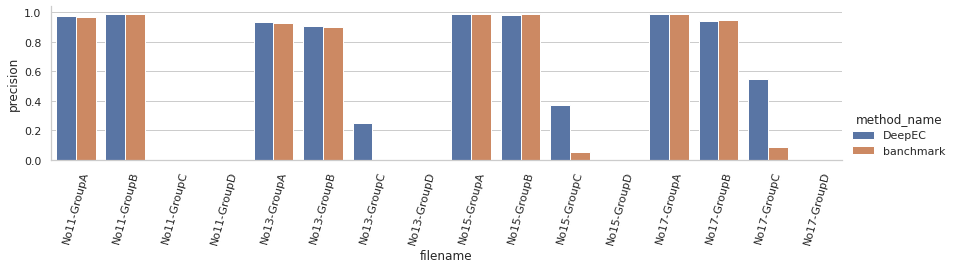

In [ ]:
barplot(df, title='precision.svg', x='filename', y='precision', hue='method_name')